# Logistic Regression

Find a classifier which maps the input(s) into two output classes.

Mathematically,\
Given, 
$$\begin{align}
X &= [x^{(1)} x^{(2)} \ldots x^{(m)}] \\
y &= [y^{(1)} y^{(2)} \ldots y^{(m)}] \;\; y^{(j)} \in \{0,1\}
\end{align}$$
and a logistic model,
$$\hat{y} = f(X) = \sigma(\theta^{T}X) \textrm{ with } 0 \leq \hat{y} \leq 1$$
Find parmeters $\theta$ such that the $\hat{y}$ is maximized given $y=1$ and $\hat{y}$ is minimized given $y=0$.

Also,
$$\hat{y} = P\left(y=1|X; \theta \right) = 1-P\left(y=0|X; \theta \right)$$

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

### Sigmoid Function

$$ \sigma(z) = \frac{1}{1+e^{-z}} $$

In [2]:
def sigmoid(z):
    """
    Calculates element-wise sigmoid of given input array
    
        Parameters:
            z (numpy array)    : r x c input array
        Returns
            sigma (numpy array): Element-wise sigmoid r x c array  
    """
    sigma = 1/(1+np.exp(-z))
    return sigma

Text(0.5,1,'Sigmoid Function')

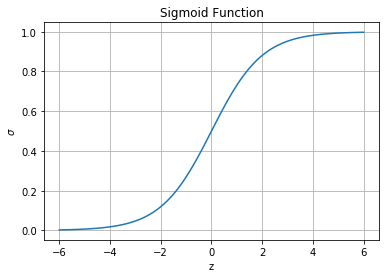

In [3]:
z = np.linspace(-6,6,100)
sigma = sigmoid(z)
plt.plot(z,sigma)
plt.grid()
plt.xlabel('z')
plt.ylabel('$\sigma$')
plt.title('Sigmoid Function')

### Logistic Regression Cost Function
$$\begin{align}
\hat{y}^{(j)} &= \sigma(z^{(j)}) \\
z^{(j)} &= \theta_1 x^{(j)}_1 + \theta_2 x^{(j)}_2 + \ldots + \theta_n x^{(j)}_n
\end{align}$$
$$J(\theta) = \frac{1}{m}\sum_{j=1}^{m}\left[-y^{(j)}\log{\hat{y}^{(j)}}-\left(1-y^{(j)}\right)\log\left(1-\hat{y}^{(j)}\right)\right]$$

In [4]:
def computeCost(X, y, theta):
    '''
    Computes cost and estimated output for logistic regression.
    
        Parameters:
            X (numpy array)    : n x m input features matrix (n: number of parameters, m: number of examples)
            y (numpy array)    : 1 x m output row vector with each element 0 or 1 
            theta (numpy array): n x 1 parameter column vector
        Returns:
            J (double)         : Cost
            y_hat (double)     : Estimated output
    '''
    y_hat = sigmoid(np.dot(theta.T, X))
    J = 1/m*(-np.sum(np.log(y_hat[y==1]))-np.sum(np.log(1-y_hat[y==0])))
    return (J, y_hat)

### Gradient Descent for Logistic Regression

$$\theta_i := \theta_i - \alpha \frac{\partial J}{\partial \theta_i}$$
$$\begin{align}
\frac{\partial J}{\partial \theta_i} &= \frac{1}{m} \sum_{j=1}^{m} \left[-y^{(j)}\frac{1}{\hat{y}^{(j)}}\frac{\partial \hat{y}^{(j)}}{\partial \theta_i} + \left(1-y^{(j)}\right)\frac{1}{1-\hat{y}^{(j)}}\frac{\partial \hat{y}^{(j)}}{\partial \theta_i}\right] \\
\frac{\partial J}{\partial \theta_i} &= \frac{1}{m} \sum_{j=1}^{m} \left[\left(-\frac{y^{(j)}}{\hat{y}^{(j)}} + \frac{1-y^{(j)}}{1-\hat{y}^{(j)}}\right)\frac{\partial \hat{y}^{(j)}}{\partial \theta_i}\right]
\end{align}$$
---
$$\begin{align}
\frac{\partial \hat{y}^{(j)}}{\partial \theta_i} &= \sigma '\left(z^{(j)}\right) \frac{\partial z^{(j)}}{\partial \theta_i} \\
                                                 &= \sigma \left(z^{(j)}\right)\left(1-\sigma \left(z^{(j)}\right)\right) x_i^{(j)}\\
\frac{\partial \hat{y}^{(j)}}{\partial \theta_i} &= \hat{y}^{(j)}\left(1-\hat{y}^{(j)}\right) x_i^{(j)}\\
\end{align}$$

---
$$\begin{align}
\frac{\partial J}{\partial \theta_i} &= \frac{1}{m} \sum_{j=1}^{m} \left[-y^{(j)}\left(1-\hat{y}^{(j)}\right) + \left(1-y^{(j)}\right)\hat{y}^{(j)}\right]x_i^{(j)}\\
\frac{\partial J}{\partial \theta_i} &= \frac{1}{m} \sum_{j=1}^{m} \left( \hat{y}^{(j)}-y^{(j)} \right) x_i^{(j)}
\end{align}$$

#### Vectorization of Gradient Descent for Logistic Regression (Same as Linear Regression)
$$D\theta = \frac{1}{m} X(\hat{y}-y)^T \\
\theta := \theta - \alpha D\theta$$

In [5]:
def gradientDescent(X, y, theta, alpha, n_iterations):
    """
    Performs gradient descent for number of iterations
    
        Parameters:
            X (numpy array)    : n x m input features matrix (n: number of parameters, m: number of examples)
            y (numpy array)    : 1 x m output row vector with each element 0 or 1
            theta (numpy array): n x 1 parameter column vector
            alpha (double)     : Learning rate (Hyperparameter)
            n_iterations (int) : No. of iterations (Hyperparamter)
            verbose (boolean)  : Whether to print cost at every 10^4 iterations
        Returns:
            theta (numpy array)    : Modified n x 1 parameter column vector
            J_iterations (list)    : Cost over n_iterations 
    """
    J_iterations = []
    for k in range(n_iterations):
        # Compute cost and estimated value
        J, y_hat = computeCost(X, y, theta)
        
        # Save cost every 1e4 iteration
        if k % 10_000 == 0:
            J_iterations.append(J)
            print("Iteration #{:,}".format(k), "| Cost:", J, end='\r')
        
        # Calculate gradients
        D_theta = 1/m * np.dot(X, (y_hat-y).T)
        
        # Update parameters
        theta = theta - alpha*D_theta
    print("Iteration #"+str(k+1), "| Cost:", J)
    
    return (theta, J_iterations)

### 2D Logistic Regression

In [6]:
def plotData(X, y):
    '''
    Plots Exam 1 score v/s Exam 2 score with pass/fail represented by color. 
    
        Parameters:
            X (list or numpy array): 3 x m array with each column as [Exam1Score; Exam2Score; 1]
            y (list or numpy array): 0 - Fail or 1 - Pass
        Returns:
            None
    '''
    plt.figure()
    X1_pos, X2_pos = X[1,y.squeeze()==1], X[2,y.squeeze()==1]
    X1_neg, X2_neg = X[1,y.squeeze()==0], X[2,y.squeeze()==0]
    plt.scatter(X1_pos, X2_pos, marker='+')
    plt.scatter(X1_neg, X2_neg, marker='x')
    plt.xlabel('Exam 1 Score')
    plt.ylabel('Exam 2 Score')

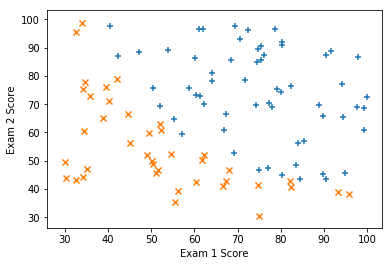

In [7]:
# Load and preprocess data
data = np.genfromtxt('data_classification_2d.csv', delimiter=',')
m, n = data.shape
X = (data[:,0:-1].T).reshape((n-1,m))
y = data[:,-1].reshape((1,m))
# Append a row of ones for bias parameter
X = np.append(np.ones((1,m)), X, axis=0)

# Plot data
plotData(X, y)

In [8]:
%%time

# Initialize parameters
theta = np.zeros((n,1))

# Set hyperparameters
alpha = 0.00125
n_iterations = 5_000_000

# Run gradient descent
theta, J_iterations = gradientDescent(X, y, theta, alpha, n_iterations)

Iteration #5000000 | Cost: 0.2037841977492201648
Wall time: 3min 54s


Text(0.5,0,'Iteration')

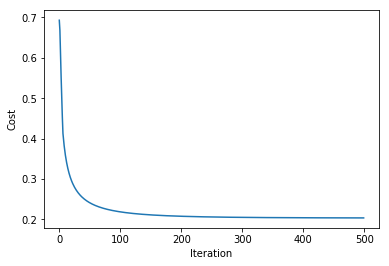

In [9]:
plt.plot(J_iterations)
plt.ylabel("Cost")
plt.xlabel("Iteration")

In [10]:
theta = theta.squeeze()
print("theta:", theta)

theta: [-23.8057683    0.19539129   0.19050134]


### Plot Decision Boundary

<Figure size 432x288 with 0 Axes>

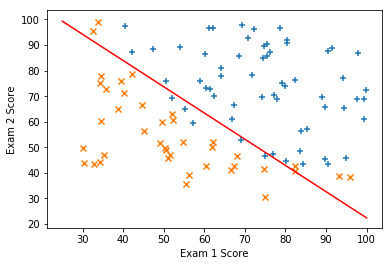

In [11]:
plt.figure()
plotData(X,y)

x1_decision = np.array([25, 100])
x2_decision = -1/theta[2]*(theta[0]+theta[1]*x1_decision)
plt.plot(x1_decision, x2_decision, 'r')